Name: Ankita Bera

Roll-number: 1828229

House: Ra's al Ghul

# EDA, FE, FS & Modeling Assignment

In [1]:
import pandas as pd
import datetime

In [2]:
df = pd.read_excel('1828229_HRC_dataset_Excel.xlsx')
df.head(3)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200732755,KROGER systems,2019-01-22,2019,1928568759,2019-01-05,20190104,20190105,20190120,USD,RV,1,NaN,85745.37,20190105,NAA8,1.928569e+09,0
1,U001,200794332,COST foundation,2019-09-23,2019,1929830151,2019-09-05,20190905,20190905,20190920,USD,RV,1,NaN,14838.48,20190905,NAAX,1.929830e+09,0
2,U001,200783609,PROFIC associates,2020-03-17,2020,1930488416,2020-02-13,20200206,20200213,20200316,USD,RV,1,NaN,11501.00,20200213,NA32,1.930488e+09,0


### Analysing the statistical measures of our data set

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              45248 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  int64         
 5   doc_id                  50000 non-null  int64         
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  int64         
 8   document_create_date.1  50000 non-null  int64         
 9   due_in_date             50000 non-null  int64         
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  int64 

In [4]:
#Deriving the stastics of the amount that is yet to be paid for that invoice
df['total_open_amount'].describe()

count    5.000000e+04
mean     3.209308e+04
std      3.945076e+04
min      7.900000e-01
25%      4.833398e+03
50%      1.732431e+04
75%      4.677678e+04
max      1.311833e+06
Name: total_open_amount, dtype: float64

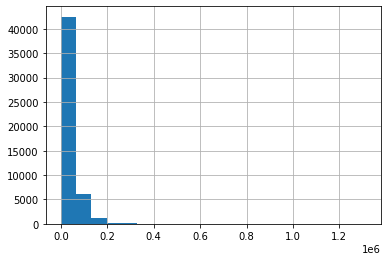

In [5]:
#Performing exploratory data analysis on the amount due for the invoice
import matplotlib.pyplot as plt
fig=df.total_open_amount.hist(bins=20)

In [6]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 4752
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    8
isOpen                        0
dtype: int64

In [7]:
df.nunique()

business_code                 6
cust_number                1105
name_customer              4286
clear_date                  401
buisness_year                 2
doc_id                    50000
posting_date                499
document_create_date        501
document_create_date.1      499
due_in_date                 545
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         45243
baseline_create_date        502
cust_payment_terms           74
invoice_id                49992
isOpen                        2
dtype: int64

### Dropping Constant, Quasi-constant, and Null columns

In [8]:
#Dropping primary key columns doc_id and invoice_id as they have unique values at all data points
#Dropping posting_id since it is a constant column
print(df['posting_id'].value_counts())
print(df['doc_id'].value_counts())

1    50000
Name: posting_id, dtype: int64
1928792063    1
1929511442    1
1929274630    1
1929673989    1
1929334019    1
             ..
1930148212    1
1929352278    1
1929321544    1
1929761423    1
1928658944    1
Name: doc_id, Length: 50000, dtype: int64


In [9]:
df.drop(columns=['area_business','posting_id','doc_id','invoice_id'], axis=1, inplace=True)

In [10]:
df.head(3)

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,200732755,KROGER systems,2019-01-22,2019,2019-01-05,20190104,20190105,20190120,USD,RV,85745.37,20190105,NAA8,0
1,U001,200794332,COST foundation,2019-09-23,2019,2019-09-05,20190905,20190905,20190920,USD,RV,14838.48,20190905,NAAX,0
2,U001,200783609,PROFIC associates,2020-03-17,2020,2020-02-13,20200206,20200213,20200316,USD,RV,11501.00,20200213,NA32,0


**Checking for quasi-constant values**

In [11]:
#Percentage of observations showing each of the different values
df['buisness_year'].value_counts()/50000

2019    0.78516
2020    0.21484
Name: buisness_year, dtype: float64

In [12]:
df['isOpen'].value_counts()/50000

0    0.90496
1    0.09504
Name: isOpen, dtype: float64

In [13]:
df['document type'].value_counts()/50000

RV    0.99984
X2    0.00016
Name: document type, dtype: float64

In [14]:
#dropping document type column since it is a constant column
df.drop(columns = 'document type' , inplace = True)

In [15]:
df['invoice_currency'].value_counts()/50000

USD    0.92264
CAD    0.07736
Name: invoice_currency, dtype: float64

**Convert date columns to datetime**

In [16]:
df['buisness_year']=df['buisness_year'].astype('int')

In [17]:
df['clear_date']= pd.to_datetime(df['clear_date']) 
df['due_in_date'] = pd.to_datetime(df['due_in_date'],format='%Y%m%d')

In [18]:
# Converting all the date columns into datetime format
df[['document_create_date','document_create_date.1','baseline_create_date']]=df[['document_create_date','document_create_date.1','baseline_create_date']].apply(pd.to_datetime, format='%Y%m%d')

In [19]:
# transpose the dataframe, so that the columns are the rows of the new dataframe
data_t = df.T

# check if there are duplicated rows (the columns of the original dataframe)
# this is a computionally expensive operation, so it might take a while
# sum indicates how many rows are duplicated

data_t.duplicated().sum()

0

Checking for date discrepancies

In [20]:
values1=df[df['clear_date']<df['document_create_date.1']].index

In [21]:
values1 #Anomaly in data because clear_date can't be before the document_create_date.1

Int64Index([], dtype='int64')

In [22]:
values2=df[df['due_in_date']<df['document_create_date.1']].index

In [23]:
values2 #Anomalies found in data because due_in_date can't be before the document_create_date.1

Int64Index([   87,   225,   337,   709,   760,   824,   997,  1008,  1646,
             1718,
            ...
            47717, 47831, 48582, 48638, 48749, 48993, 49167, 49255, 49851,
            49919],
           dtype='int64', length=162)

In [24]:
values3=df[df['clear_date']<df['baseline_create_date']].index #Anomalies found with clear_date before baseline_date that needs to be dropped

In [25]:
values3

Int64Index([7894, 14185, 16216, 17052, 17060, 20206, 28663, 33274], dtype='int64')

In [26]:
values4=df[df['due_in_date']<df['baseline_create_date']].index

In [27]:
values4

Int64Index([], dtype='int64')

In [28]:
is_same=df['posting_date']==df['document_create_date.1']

In [29]:
is_same.value_counts() #since values are nearly same, we are going to drop this column.

True     49992
False        8
dtype: int64

Dropping rows that contain date discrepancies

In [30]:
df.drop(values2,inplace=True)

In [31]:
df.drop(values3,inplace=True)

In [32]:
df.drop(values4,inplace=True)

In [33]:
#Dropping document_create_date since we will be working on document_create_date.1
df.drop('document_create_date',axis=1,inplace=True)

In [34]:
df.drop(columns = 'posting_date' , inplace = True)

Sorting the DataFrame according to our target column

In [35]:
df = df.sort_values(['document_create_date.1'], ascending = (True))#sort the given data in terms of clear date

In [36]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
35774,U001,200769623,WAL-MAR corp,2019-01-09,2019,2018-12-30,2019-01-14,USD,1260.47,2018-12-30,NAH4,0
41151,U001,200769623,WAL-MAR co,2019-01-10,2019,2018-12-30,2019-01-14,USD,53468.80,2018-12-30,NAH4,0
41157,U001,200729290,KROGER corp,2019-01-14,2019,2018-12-30,2019-01-14,USD,16967.72,2018-12-30,NAA8,0
5314,U001,200769623,WAL-MAR corp,2019-01-15,2019,2018-12-30,2019-01-14,USD,8187.79,2018-12-30,NAH4,0
9496,U001,200762301,C&S WH corp,2019-01-15,2019,2018-12-30,2019-01-14,USD,121095.61,2018-12-30,NAC6,0


### Encoding our categorical columns

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [38]:
df["business_code"]=le.fit_transform(df["business_code"])
df["name_customer"]=le.fit_transform(df["name_customer"])
df["invoice_currency"]=le.fit_transform(df["invoice_currency"])
df["cust_payment_terms"]=le.fit_transform(df["cust_payment_terms"])

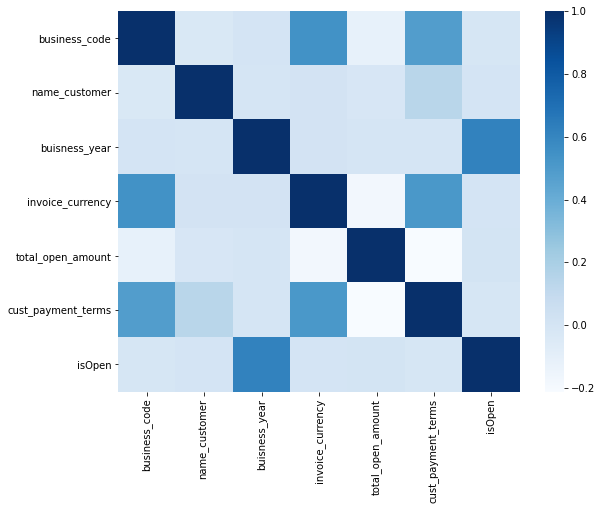

In [39]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(df.corr(),cmap="Blues")
sns.set()
plt.show()

Converting the currency of total open amount

In [40]:
import numpy as np
df["total_open_amount"]=np.where(df["invoice_currency"]=="USD", df["total_open_amount"],0.78*df["total_open_amount"])

In [41]:
#Dropping column invoice_currency since it is useless
df.drop('invoice_currency',axis=1,inplace=True)

### Train-Test-Validation Split

In [42]:
train=df.dropna(axis = 0, how='any')
train.reset_index(drop=True,inplace=True)

In [43]:
train.head(3)

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,1,200769623,4147,2019-01-09,2019,2018-12-30,2019-01-14,983.1666,2018-12-30,39,0
1,1,200769623,4146,2019-01-10,2019,2018-12-30,2019-01-14,41705.6640,2018-12-30,39,0
2,1,200729290,2239,2019-01-14,2019,2018-12-30,2019-01-14,13234.8216,2018-12-30,23,0


In [44]:
test=df[df.clear_date.isnull()]

In [45]:
test.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
47203,1,200739534,2844,NaT,2020,2020-02-27,2020-03-13,28082.9874,2020-02-27,23,1
45426,1,200769623,4154,NaT,2020,2020-02-27,2020-03-13,54271.9086,2020-02-27,39,1
49594,1,200759878,3323,NaT,2020,2020-02-27,2020-03-13,20840.0946,2020-02-27,39,1
47104,1,200905809,3736,NaT,2020,2020-02-27,2020-03-30,3106.7634,2020-02-27,16,1
48052,1,200704858,4111,NaT,2020,2020-02-27,2020-03-13,27427.1946,2020-02-27,23,1


In [46]:
print(train['document_create_date.1'].max())
print(train['document_create_date.1'].min())

2020-02-27 00:00:00
2018-12-30 00:00:00


In [47]:
train = train.sort_values(by=["document_create_date.1"]) #sorting data by datewise on documnet create date
train.reset_index(drop=True,inplace=True)

In [48]:
X_train=train[train["document_create_date.1"]<='2019-11-28'].copy()
X_temp=train[train["document_create_date.1"]>'2019-11-28'].copy()
X_train.shape, X_temp.shape

((37159, 11), (7937, 11))

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_val1, x_val2=train_test_split(X_temp, test_size=0.5, shuffle=False, random_state=0)
x_val1.shape, x_val2.shape

((3968, 11), (3969, 11))

### Creating columns for calculating the delay in between the dates

In [51]:
X_train['delay']=(X_train['clear_date']-X_train['due_in_date']).dt.days
X_train['delay']=X_train['delay'].astype('int')
X_train.reset_index(drop=True,inplace=True)
X_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,1,200769623,4147,2019-01-09,2019,2018-12-30,2019-01-14,983.1666,2018-12-30,39,0,-5
1,1,200769623,4151,2019-01-09,2019,2018-12-30,2019-01-14,12076.1940,2018-12-30,39,0,-5
2,1,200769623,4148,2019-01-10,2019,2018-12-30,2019-01-14,1189.6326,2018-12-30,39,0,-4
3,1,200769623,4145,2019-01-09,2019,2018-12-30,2019-01-14,3814.9722,2018-12-30,39,0,-5
4,1,200759878,3325,2019-01-15,2019,2018-12-30,2019-01-14,18733.2678,2018-12-30,39,0,1


In [52]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
x_val1['delay']=(x_val1['clear_date']-x_val1['due_in_date']).dt.days
x_val1['delay']=x_val1['delay'].astype(int)
x_val2['delay']=(x_val2['clear_date']-x_val2['due_in_date']).dt.days
x_val2['delay']=x_val2['delay'].astype(int)
x_val1.reset_index(drop=True,inplace=True)
x_val1.head(3)

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,1,200762301,589,2019-12-16,2019,2019-11-29,2019-12-14,56372.5188,2019-11-29,28,0,2
1,1,200704858,4114,2019-12-16,2019,2019-11-29,2019-12-14,78052.2366,2019-11-29,23,0,2
2,5,140103470,938,2019-12-23,2019,2019-11-29,2019-12-29,16732.0140,2019-11-29,62,0,-6


In [54]:
x_val2.reset_index(drop=True,inplace=True)
x_val2.head(3)

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,1,200793088,1044,2020-02-04,2020,2020-01-20,2020-02-04,11908.6188,2020-01-20,23,0,0
1,1,200776463,2226,2020-02-04,2020,2020-01-20,2020-02-04,13782.7326,2020-01-20,23,0,0
2,1,200764795,3770,2020-02-07,2020,2020-01-20,2020-02-04,4673.0034,2020-01-20,23,0,3


In [55]:
X_train.nunique()

business_code                 6
cust_number                1028
name_customer              3816
clear_date                  297
buisness_year                 1
document_create_date.1      334
due_in_date                 373
total_open_amount         33809
baseline_create_date        343
cust_payment_terms           66
isOpen                        1
delay                       189
dtype: int64

In [56]:
X_train.head(1)

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,1,200769623,4147,2019-01-09,2019,2018-12-30,2019-01-14,983.1666,2018-12-30,39,0,-5


In [57]:
test.head(1)

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
47203,1,200739534,2844,NaT,2020,2020-02-27,2020-03-13,28082.9874,2020-02-27,23,1


In [58]:
#Dropping constant columns respresented by 1

X_train.drop(columns = 'buisness_year' , inplace = True)
X_train.drop(columns = 'isOpen' , inplace = True)
x_val1.drop(columns = 'buisness_year' , inplace = True)
x_val1.drop(columns = 'isOpen' , inplace = True)
x_val2.drop(columns = 'buisness_year' , inplace = True)
x_val2.drop(columns = 'isOpen' , inplace = True)
test.drop(columns = 'buisness_year' , inplace = True)
test.drop(columns = 'isOpen' , inplace = True)

In [59]:
X_train.shape,x_val1.shape,x_val2.shape

((37159, 10), (3968, 10), (3969, 10))

**Understanding our split data better**

2.5869465303948864


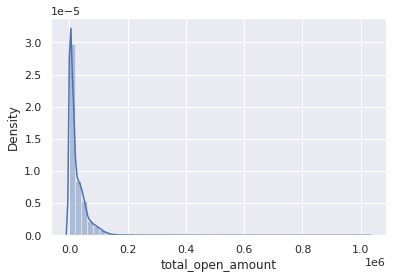

In [60]:
import seaborn as sns
print(X_train['total_open_amount'].skew())
sns.distplot(train['total_open_amount']) #We can see total_open_amount is right skewed

In [61]:
import numpy as np 

-0.9591522313728441


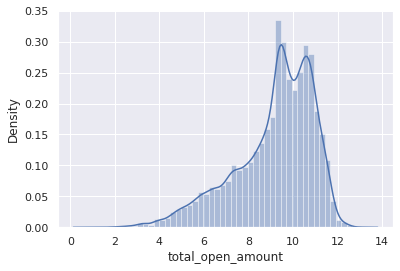

In [62]:
x = np.log(X_train['total_open_amount'])
print(x.skew())
sns.distplot(np.log(X_train['total_open_amount'])) #Skew-ness improved

0.7513730108614226


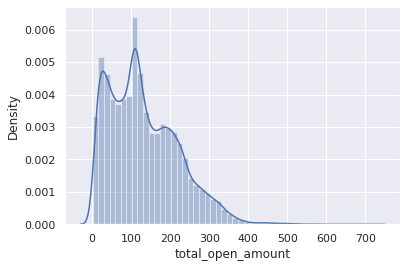

In [63]:
x1 = np.sqrt(X_train['total_open_amount'])
print(x1.skew())
sns.distplot(np.sqrt(X_train['total_open_amount'])) #Better than previous observation

-0.10314460217184436


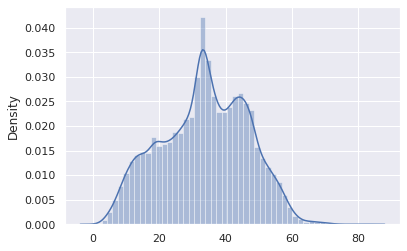

In [64]:
from scipy import stats
x2 = stats.boxcox(X_train['total_open_amount'])[0]
x3 = pd.Series(x2)
print(x3.skew())
sns.distplot(x2) #Almost resembling a Gaussian Curve

In [65]:
X_train['due_date_day']=X_train['due_in_date'].dt.day
X_train['due_date_month']=X_train['due_in_date'].dt.month
X_train['due_date_year']=X_train['due_in_date'].dt.year

In [66]:
x_val1['due_date_day']=x_val1['due_in_date'].dt.day
x_val1['due_date_month']=x_val1['due_in_date'].dt.month
x_val1['due_date_year']=x_val1['due_in_date'].dt.year

In [67]:
x_val2['due_date_day']=x_val2['due_in_date'].dt.day
x_val2['due_date_month']=x_val2['due_in_date'].dt.month
x_val2['due_date_year']=x_val2['due_in_date'].dt.year

In [68]:
test['due_date_day']=test['due_in_date'].dt.day
test['due_date_month']=test['due_in_date'].dt.month
test['due_date_year']=test['due_in_date'].dt.year

In [69]:
X_train['baseline_date_day']=X_train['baseline_create_date'].dt.day
X_train['baseline_date_month']=X_train['baseline_create_date'].dt.month
X_train['baseline_date_year']=X_train['baseline_create_date'].dt.year

In [70]:
x_val1['baseline_date_day']=x_val1['baseline_create_date'].dt.day
x_val1['baseline_date_month']=x_val1['baseline_create_date'].dt.month
x_val1['baseline_date_year']=x_val1['baseline_create_date'].dt.year

In [71]:
x_val2['baseline_date_day']=x_val2['baseline_create_date'].dt.day
x_val2['baseline_date_month']=x_val2['baseline_create_date'].dt.month
x_val2['baseline_date_year']=x_val2['baseline_create_date'].dt.year

In [72]:
test['baseline_date_day']=test['baseline_create_date'].dt.day
test['baseline_date_month']=test['baseline_create_date'].dt.month
test['baseline_date_year']=test['baseline_create_date'].dt.year

In [73]:
X_train['create_date_day']=X_train['document_create_date.1'].dt.day
X_train['create_date_month']=X_train['document_create_date.1'].dt.month
X_train['create_date_year']=X_train['document_create_date.1'].dt.year

In [74]:
x_val1['create_date_day']=x_val1['document_create_date.1'].dt.day
x_val1['create_date_month']=x_val1['document_create_date.1'].dt.month
x_val1['create_date_year']=x_val1['document_create_date.1'].dt.year

In [75]:
x_val2['create_date_day']=x_val2['document_create_date.1'].dt.day
x_val2['create_date_month']=x_val2['document_create_date.1'].dt.month
x_val2['create_date_year']=x_val2['document_create_date.1'].dt.year

In [76]:
test['create_date_day']=test['document_create_date.1'].dt.day
test['create_date_month']=test['document_create_date.1'].dt.month
test['create_date_year']=test['document_create_date.1'].dt.year

In [77]:
X_train.head(3)

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay,due_date_day,due_date_month,due_date_year,baseline_date_day,baseline_date_month,baseline_date_year,create_date_day,create_date_month,create_date_year
0,1,200769623,4147,2019-01-09,2018-12-30,2019-01-14,983.1666,2018-12-30,39,-5,14,1,2019,30,12,2018,30,12,2018
1,1,200769623,4151,2019-01-09,2018-12-30,2019-01-14,12076.1940,2018-12-30,39,-5,14,1,2019,30,12,2018,30,12,2018
2,1,200769623,4148,2019-01-10,2018-12-30,2019-01-14,1189.6326,2018-12-30,39,-4,14,1,2019,30,12,2018,30,12,2018


In [78]:
X_train.reset_index(drop=True,inplace=True)

In [79]:
X_train.shape

(37159, 19)

In [80]:
x_val1.reset_index(drop=True,inplace=True)

In [81]:
x_val1.shape

(3968, 19)

In [82]:
x_val2.reset_index(drop=True,inplace=True)

In [83]:
x_val2.shape

(3969, 19)

In [84]:
test.shape

(4734, 18)

In [85]:
X_train.head(1)

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay,due_date_day,due_date_month,due_date_year,baseline_date_day,baseline_date_month,baseline_date_year,create_date_day,create_date_month,create_date_year
0,1,200769623,4147,2019-01-09,2018-12-30,2019-01-14,983.1666,2018-12-30,39,-5,14,1,2019,30,12,2018,30,12,2018


In [86]:
x_val2.head(1)#index missing due to some reason

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay,due_date_day,due_date_month,due_date_year,baseline_date_day,baseline_date_month,baseline_date_year,create_date_day,create_date_month,create_date_year
0,1,200793088,1044,2020-02-04,2020-01-20,2020-02-04,11908.6188,2020-01-20,23,0,4,2,2020,20,1,2020,20,1,2020


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


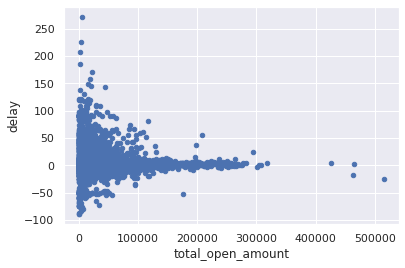

In [87]:
X_train.plot(x="total_open_amount", y="delay", kind="scatter")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


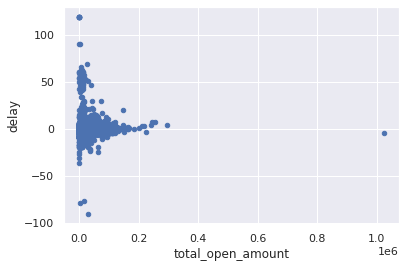

In [88]:
x_val1.plot(x="total_open_amount", y="delay", kind="scatter")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


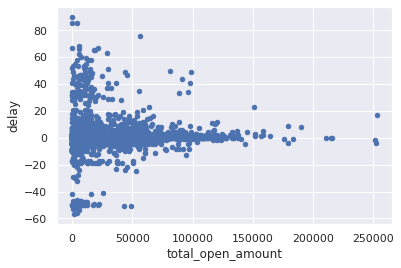

In [89]:
x_val2.plot(x="total_open_amount", y="delay", kind="scatter")

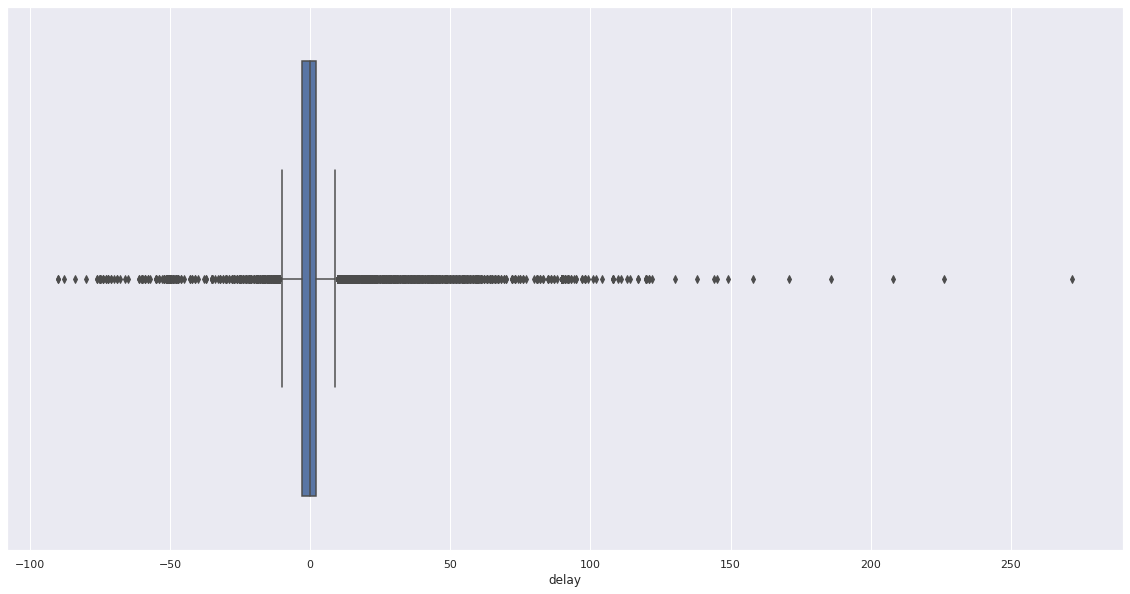

In [90]:
plt.figure(figsize=(20,10))
sns.boxplot(X_train['delay'])
plt.show()

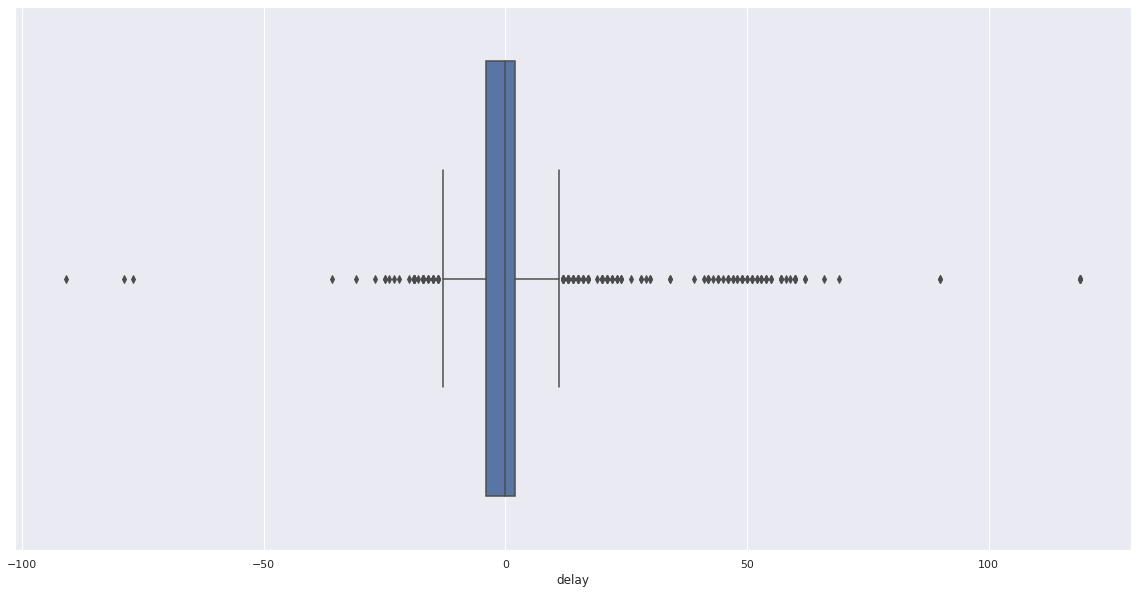

In [91]:
plt.figure(figsize=(20,10))
sns.boxplot(x_val1['delay'])
plt.show()

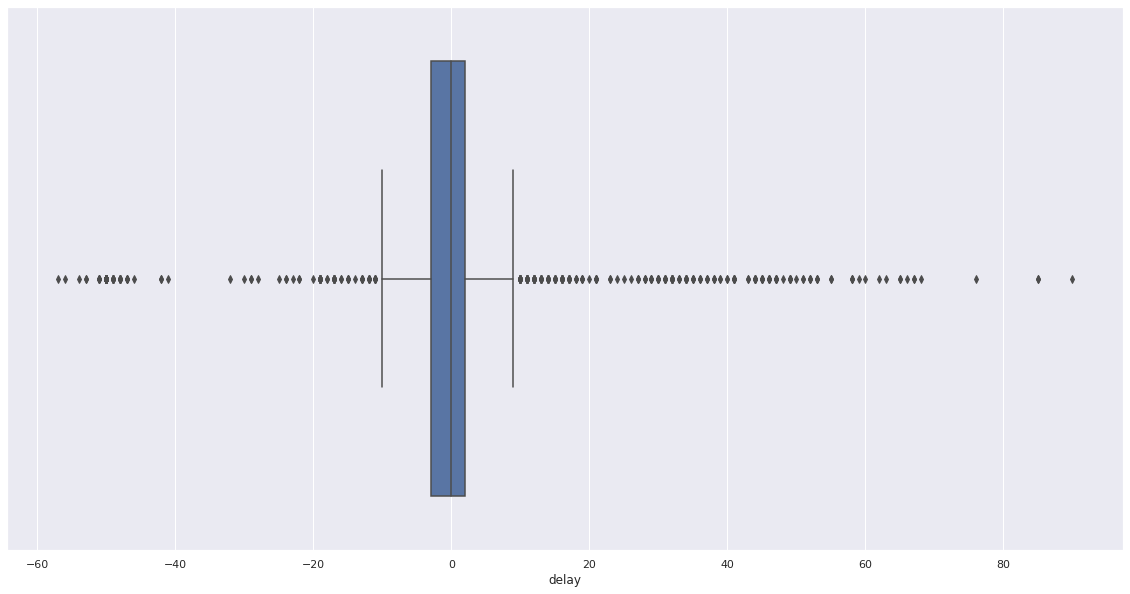

In [92]:
plt.figure(figsize=(20,10))
sns.boxplot(x_val2['delay'])
plt.show()

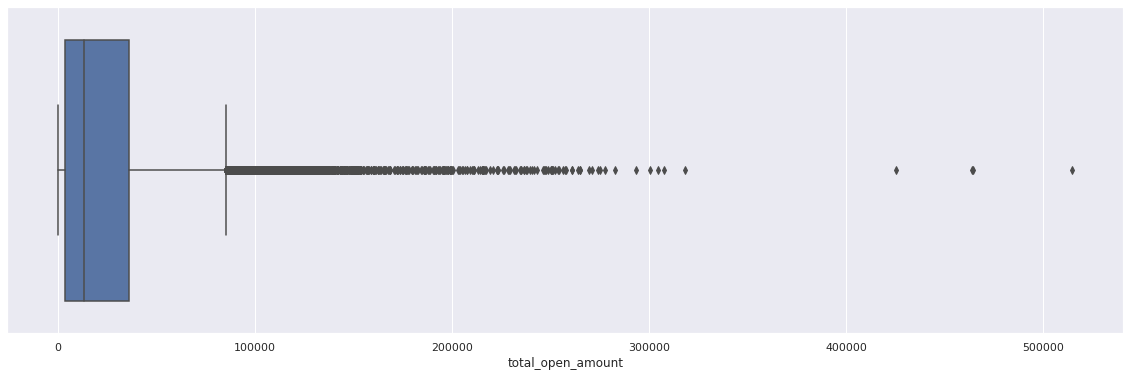

In [93]:
plt.figure(figsize=(20,6))
sns.boxplot(X_train['total_open_amount'])
plt.show()

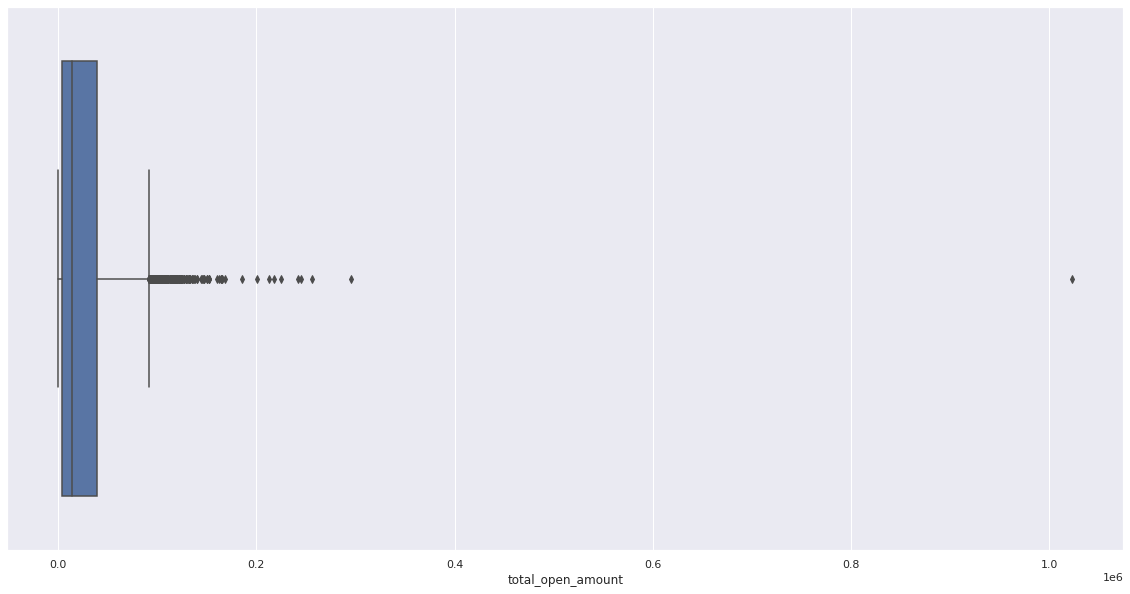

In [94]:
plt.figure(figsize=(20,10))
sns.boxplot(x_val1['total_open_amount'])
plt.show()

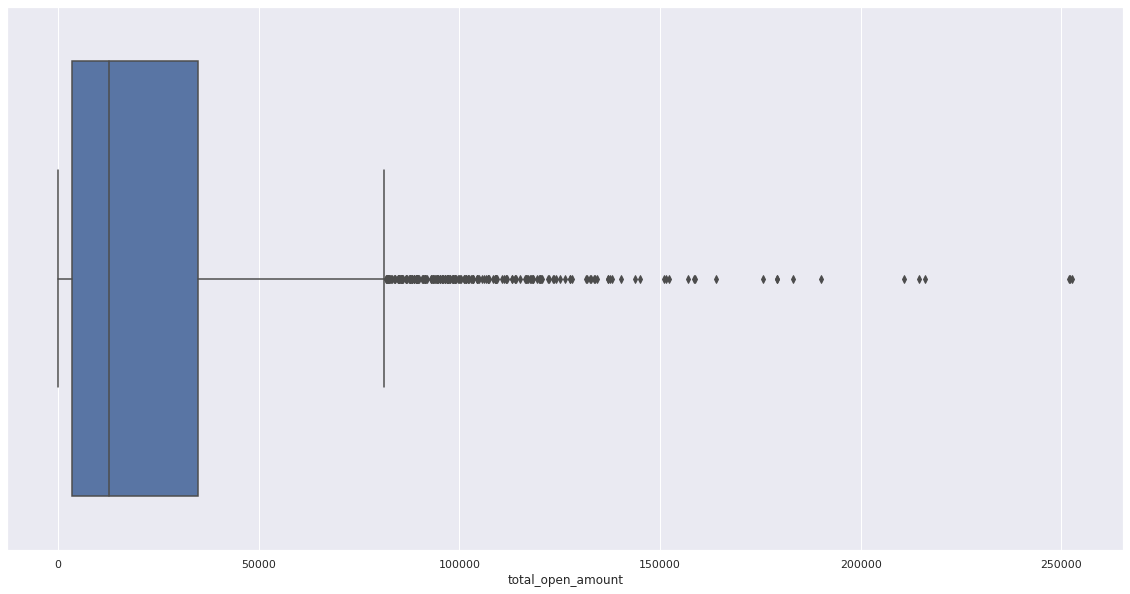

In [95]:
plt.figure(figsize=(20,10))
sns.boxplot(x_val2['total_open_amount'])
plt.show()

The above plots show that total_open_amount and delay columns has a lot of outliers.

### IQR Treatment

In [96]:
upper_lim1=X_train['total_open_amount'].quantile(0.99) 
print(upper_lim1)

129840.64797599992


In [97]:
upper_lim2=x_val1['total_open_amount'].quantile(0.99) 
print(upper_lim2)

130279.39524599988


In [98]:
upper_lim3=x_val2['total_open_amount'].quantile(0.99) 
print(upper_lim3)

122564.75743200019


In [99]:
upper_lim4=test['total_open_amount'].quantile(0.99) 
print(upper_lim4)

121522.60512600001


In [100]:
X_train.loc[(X_train['total_open_amount']>upper_lim1),'total_open_amount']=upper_lim1

In [101]:
x_val1.loc[(x_val1['total_open_amount']>upper_lim2),'total_open_amount']=upper_lim2

In [102]:
x_val2.loc[(x_val2['total_open_amount']>upper_lim3),'total_open_amount']=upper_lim3

In [103]:
test.loc[(test['total_open_amount']>upper_lim4),'total_open_amount']=upper_lim4

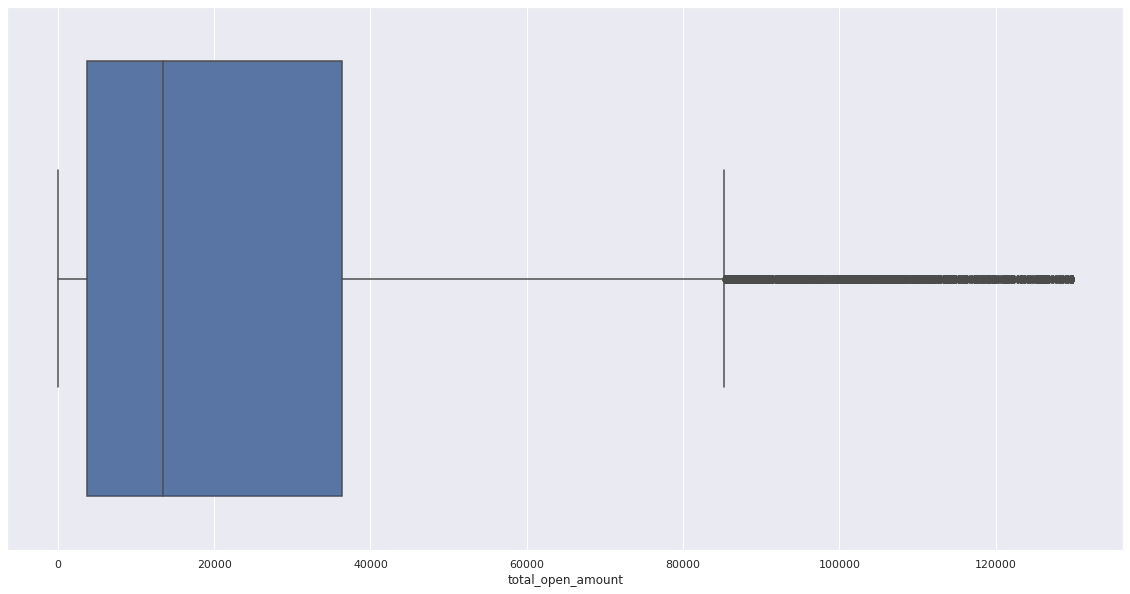

In [104]:
plt.figure(figsize=(20,10))
sns.boxplot(X_train['total_open_amount'])
plt.show()

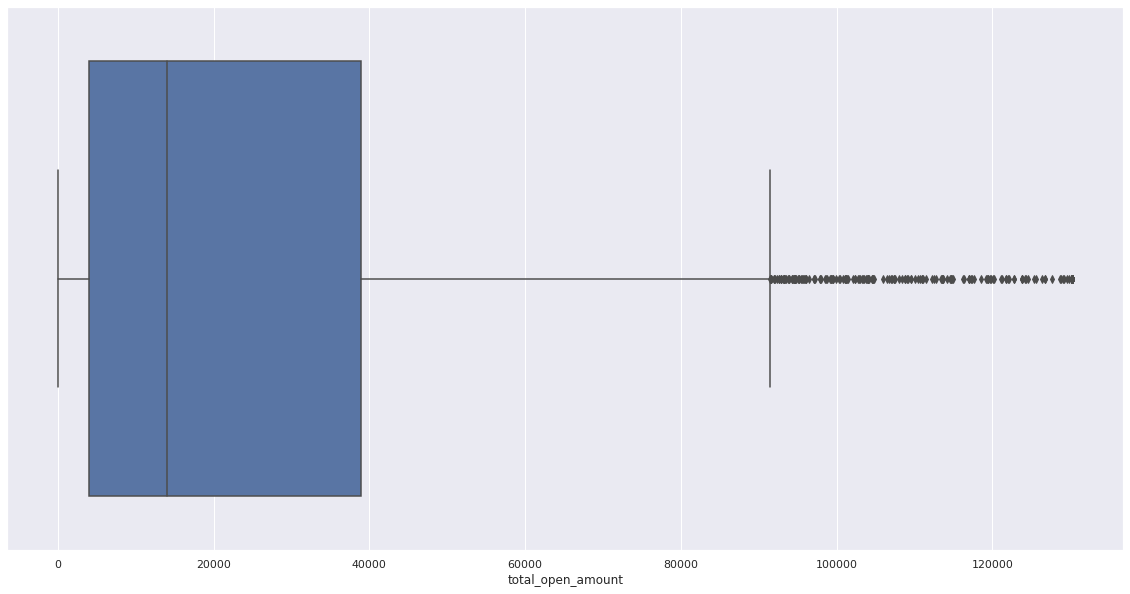

In [105]:
plt.figure(figsize=(20,10))
sns.boxplot(x_val1['total_open_amount'])
plt.show()

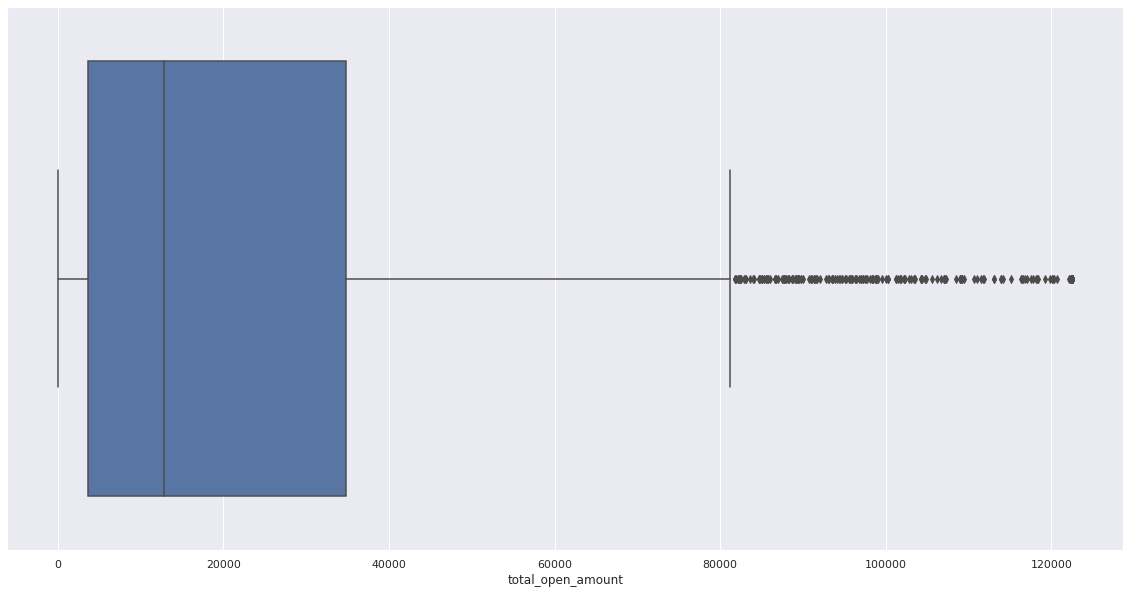

In [106]:
plt.figure(figsize=(20,10))
sns.boxplot(x_val2['total_open_amount'])
plt.show()

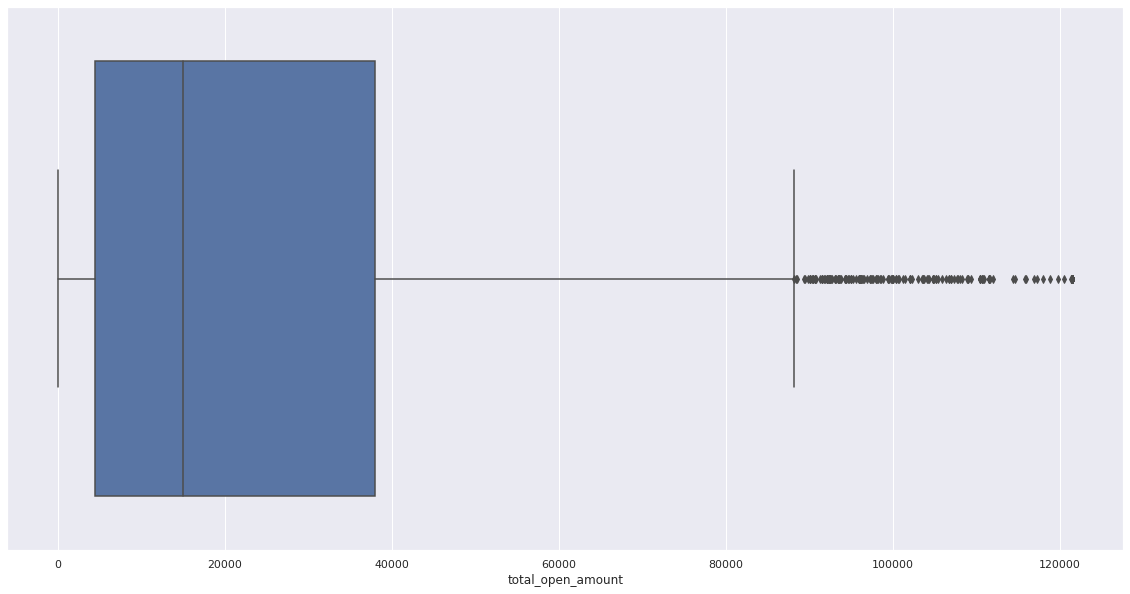

In [107]:
plt.figure(figsize=(20,10))
sns.boxplot(test['total_open_amount'])
plt.show()

In [108]:
upper_lim=X_train['delay'].quantile(0.94) #IQR treatment  of target
lower_lim=X_train['delay'].quantile(0.05)
print(upper_lim)
print(lower_lim)

9.0
-7.0


In [109]:
upper_lim2=x_val1['delay'].quantile(0.94) #IQR treatment  of target
lower_lim2=x_val1['delay'].quantile(0.05)
print(upper_lim2)
print(lower_lim2)

6.0
-8.0


In [110]:
upper_lim3=x_val2['delay'].quantile(0.94) #IQR treatment  of target
lower_lim3=x_val2['delay'].quantile(0.05)
print(upper_lim3)
print(lower_lim3)

10.0
-9.0


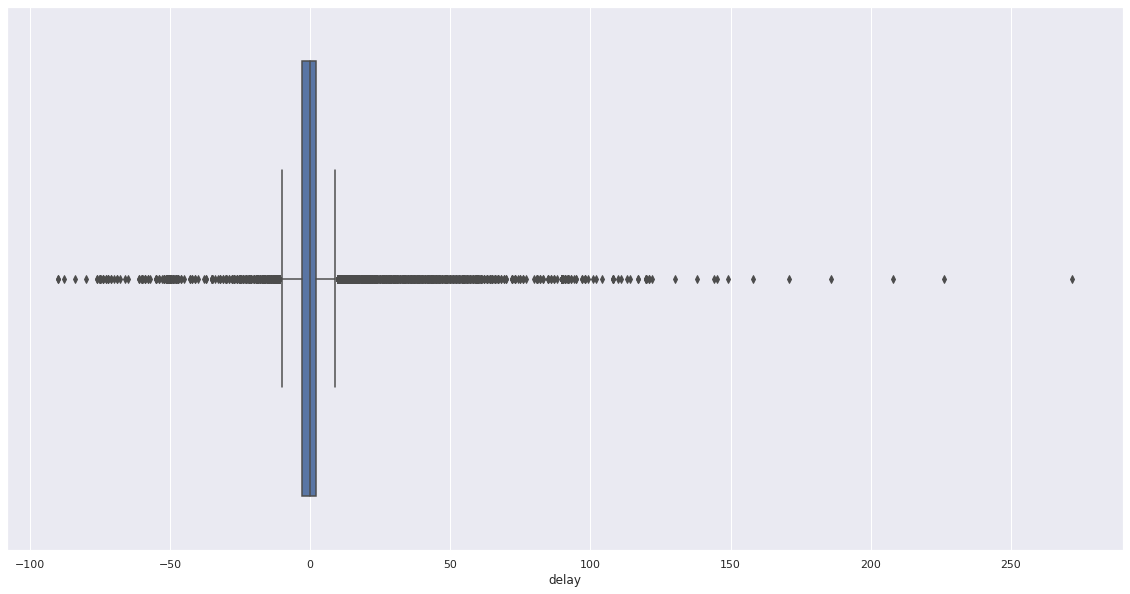

In [111]:
plt.figure(figsize=(20,10))
sns.boxplot(X_train['delay'])
plt.show()

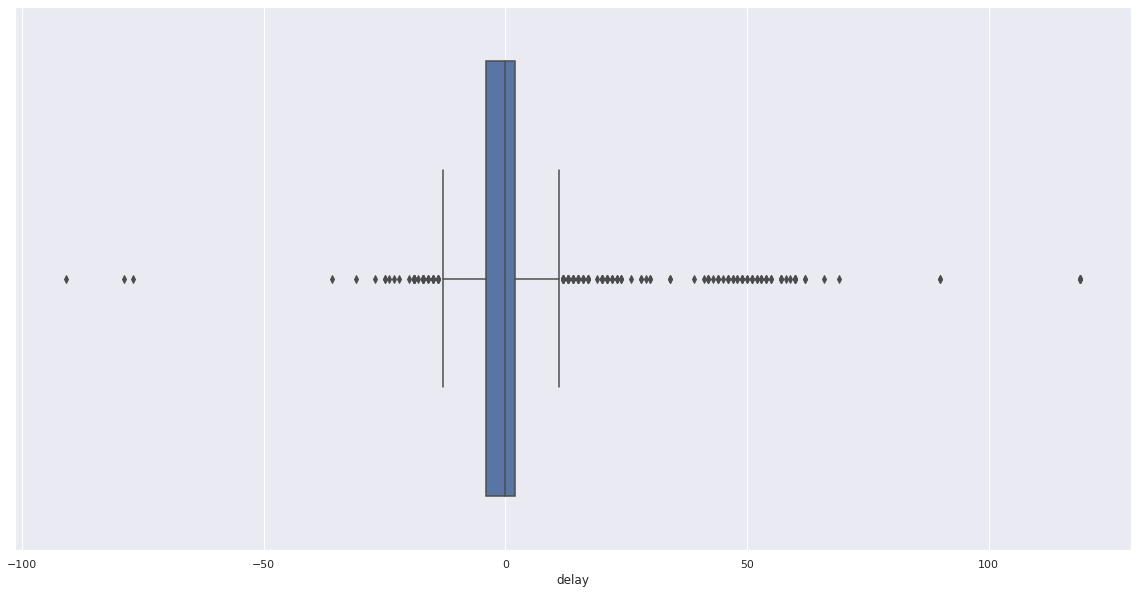

In [112]:
plt.figure(figsize=(20,10))
sns.boxplot(x_val1['delay'])
plt.show()

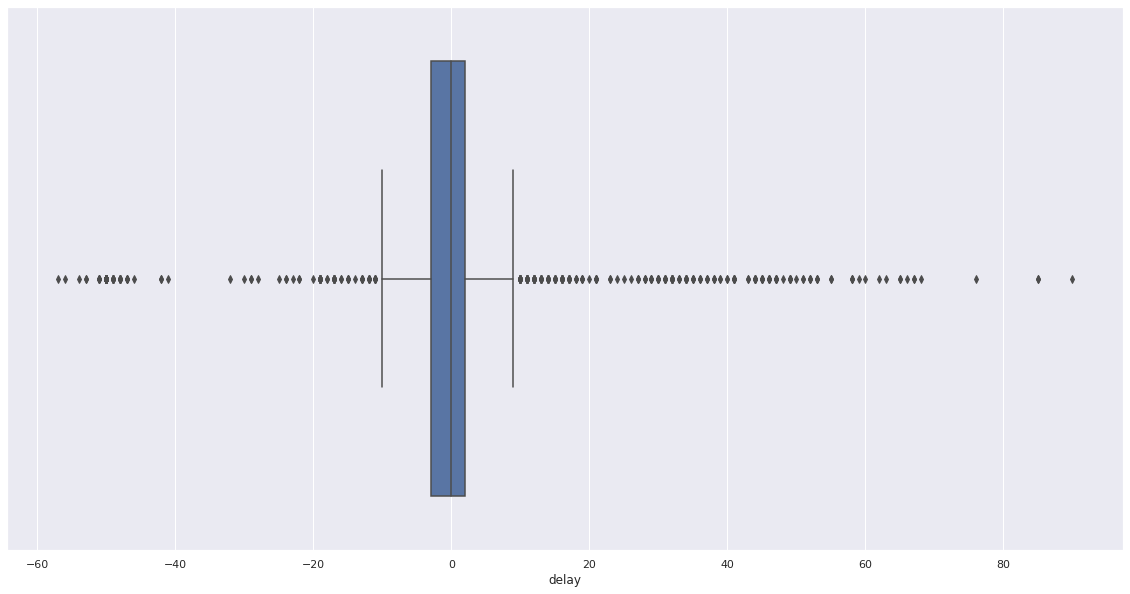

In [113]:
plt.figure(figsize=(20,10))
sns.boxplot(x_val2['delay'])
plt.show()

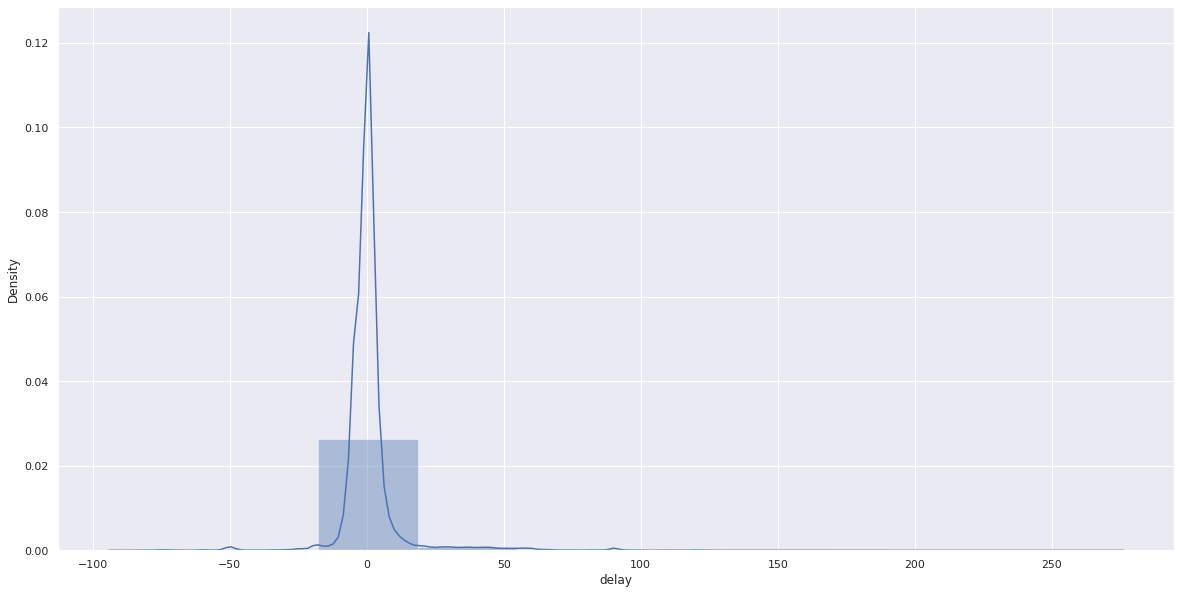

In [114]:
plt.figure(figsize=(20,10))   #Distribution Curve for X_train
sns.distplot(X_train['delay'], bins=10)
plt.show()

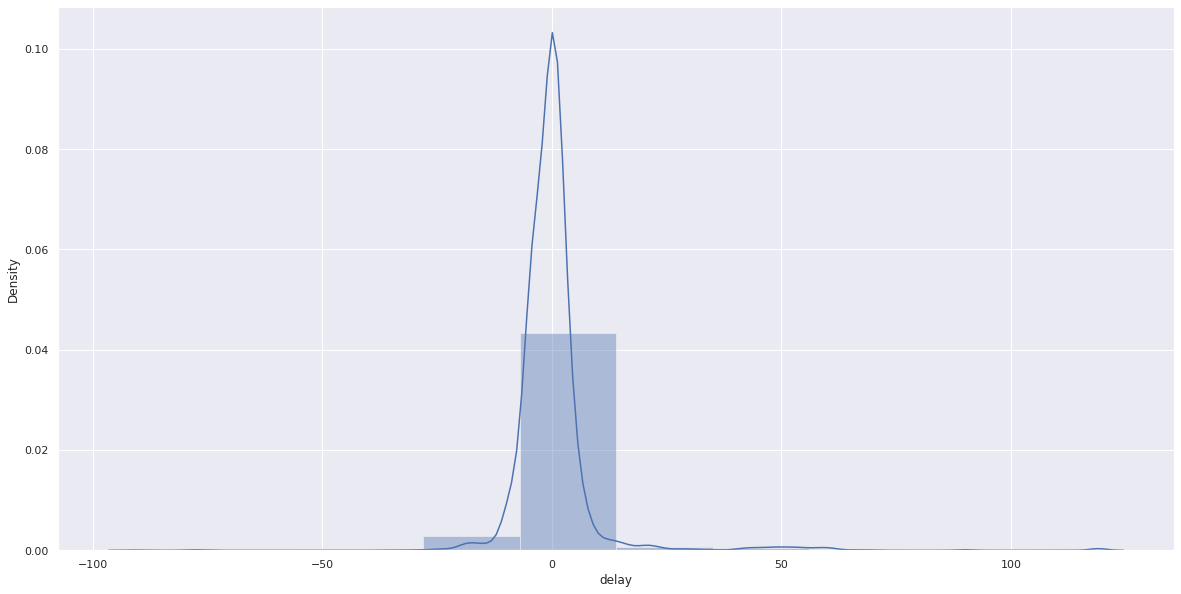

In [115]:
plt.figure(figsize=(20,10))   #Distribution Curve for x_val1
sns.distplot(x_val1['delay'], bins=10)
plt.show()

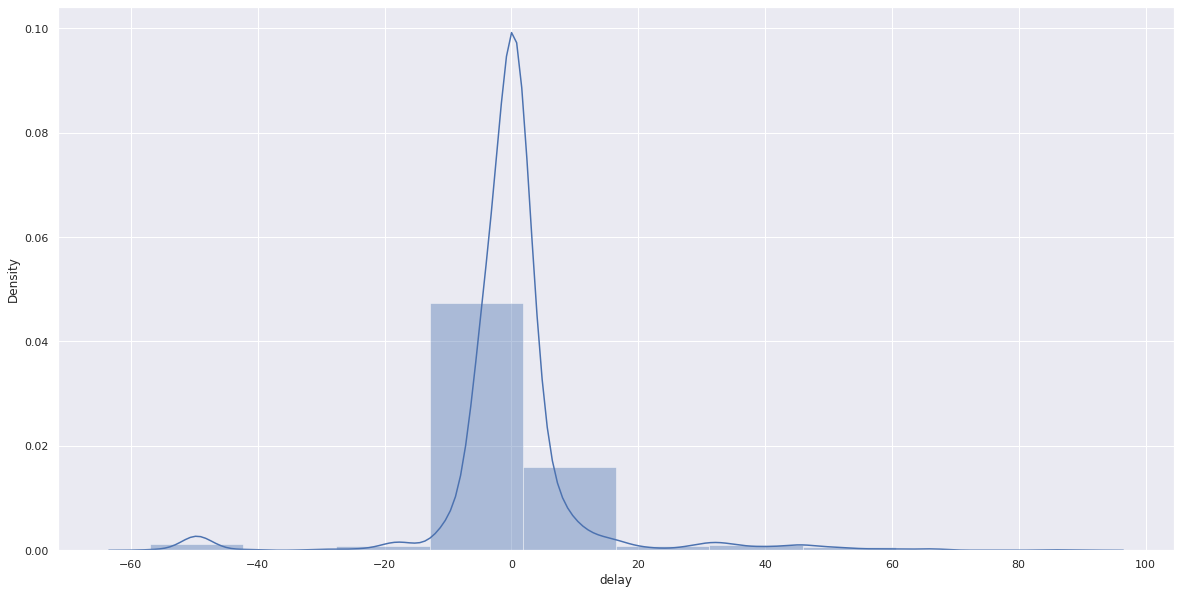

In [116]:
plt.figure(figsize=(20,10))   #Distribution Curve for x_val2
sns.distplot(x_val2['delay'], bins=10)
plt.show()

**Generating new columns for our data**

In [117]:
groupdata=X_train.groupby('name_customer')['delay'].agg('mean') # to see how much avg delay a customer can do
avg_delay=groupdata.to_frame()
avg_delay

,delay
name_customer,
0,-3.0
1,2.0
2,0.0
3,6.5
4,0.5
...,...
4274,0.0
4276,0.0
4277,0.0


In [118]:
groupdata2=x_val1.groupby('name_customer')['delay'].agg('mean') # to see how much avg delay a customer can do
avg_delay2=groupdata2.to_frame()
avg_delay2

,delay
name_customer,
12,1.0
17,1.0
18,3.0
19,1.0
27,0.0
...,...
4257,-7.0
4264,1.0
4273,4.0


In [119]:
groupdata3=x_val2.groupby('name_customer')['delay'].agg('mean') # to see how much avg delay a customer can do
avg_delay3=groupdata3.to_frame()
avg_delay3

,delay
name_customer,
12,1.0
13,2.0
15,2.0
19,1.0
20,1.0
...,...
4256,-5.0
4262,-5.0
4263,-5.0


In [120]:
for i in groupdata.index:
  X_train.loc[X_train.name_customer==i, "avg_cust_delay"] = avg_delay['delay'][i]

In [121]:
for i in groupdata2.index:
  x_val1.loc[x_val1.name_customer==i, "avg_cust_delay"] = avg_delay2['delay'][i]

In [122]:
for i in groupdata3.index:
  x_val2.loc[x_val2.name_customer==i, "avg_cust_delay"] = avg_delay3['delay'][i]

In [123]:
temp=X_train.groupby('due_date_month')['delay'].agg({"mean","median","count",np.max,np.min})
temp

,mean,median,amin,amax,count
due_date_month,,,,,
1,1.983503,0,-30,226,1576
2,1.674443,0,-29,208,2872
3,2.030366,0,-37,272,3392
4,0.828587,0,-52,158,3582
5,0.822216,0,-88,145,3718
6,0.871495,0,-84,149,3424
7,1.451836,0,-54,138,3322
8,1.166423,0,-76,108,3419
9,0.815566,0,-90,90,3302


In [124]:
temp2=x_val1.groupby('due_date_month')['delay'].agg({"mean","median","count",np.max,np.min})
temp2

,mean,median,amin,amax,count
due_date_month,,,,,
1,0.957714,0.0,-31,119,1750
2,0.813433,1.0,-27,69,402
3,3.526316,4.0,-77,44,19
4,15.000000,15.0,15,15,1
5,-41.500000,-40.0,-91,5,4
11,20.500000,20.5,20,21,6
12,-0.619261,0.0,-15,60,1786


In [125]:
temp3=x_val2.groupby('due_date_month')['delay'].agg({"mean","median","count",np.max,np.min})
temp3

,mean,median,amin,amax,count
due_date_month,,,,,
1,14.250000,4.5,0,37,44
2,1.469396,0.0,-23,90,2467
3,-0.063430,0.0,-41,59,1277
4,-19.120482,-2.0,-57,41,166
5,-18.250000,-1.0,-56,4,12
6,-24.000000,-22.0,-32,-18,3


In [126]:
for i in temp.index:
    X_train.loc[X_train['due_date_month']==i, "dueDateWise_avg_monthly_delay_"] = temp['mean'][i]
X_train.shape

(37159, 21)

In [127]:
for i in temp2.index:
    x_val1.loc[X_train['due_date_month']==i, "dueDateWise_avg_monthly_delay_"] = temp['mean'][i]
x_val1.shape

(3968, 21)

In [128]:
for i in temp3.index:
    x_val2.loc[X_train['due_date_month']==i, "dueDateWise_avg_monthly_delay_"] = temp['mean'][i]
x_val2.shape

(3969, 21)

**Binning our data**

In [129]:
X_train['amount_bins'] = pd.qcut(X_train['total_open_amount'],q=4,labels=[1,2,3,4])

In [130]:
x_val1['amount_bins'] = pd.qcut(x_val1['total_open_amount'],q=4,labels=[1,2,3,4])
x_val2['amount_bins'] = pd.qcut(x_val2['total_open_amount'],q=4,labels=[1,2,3,4])

In [131]:
X_train['amount_bins'].head()

0    1
1    2
2    1
3    2
4    3
Name: amount_bins, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [132]:
X_train.shape

(37159, 22)

In [133]:
x_val1.shape

(3968, 22)

In [134]:
x_val2.shape

(3969, 22)

In [135]:
test.shape

(4734, 18)

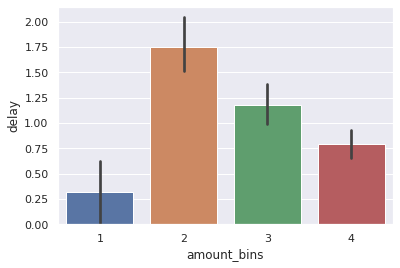

In [136]:
sns.barplot(x='amount_bins',y='delay',data=X_train)
sns.set()

**Exploring various aspects of our data**

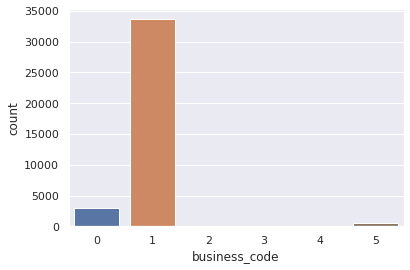

In [137]:
sns.countplot(x='business_code', data=X_train) #business_code 1 has maximum number of occurences in buisness code

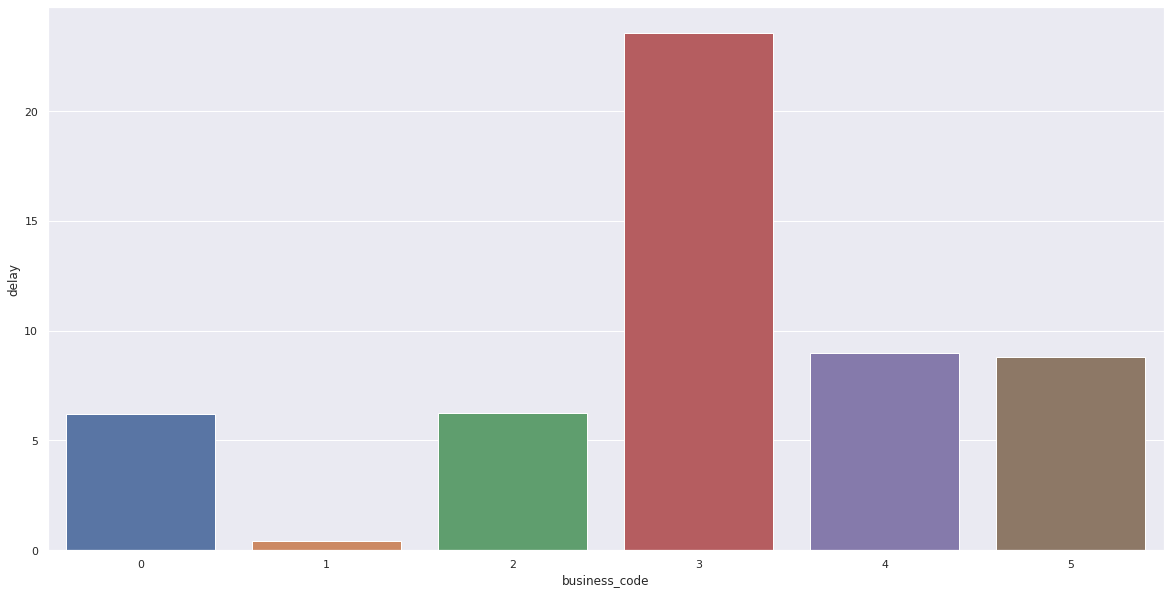

In [138]:
plt.figure(figsize=(20,10))
temp1=pd.DataFrame(X_train.groupby('business_code')['delay'].mean())
sns.barplot(x=temp1.index,y='delay',data=temp1) #business_code 3 have highest mean of delay

**Creating more columns for futher analysis.**

In [139]:
d = X_train.groupby('business_code')['delay'].mean().to_dict()

In [140]:
X_train['bcode_avg_delay'] = X_train['business_code'].map(d)
x_val1['bcode_avg_delay'] = X_train['business_code'].map(d)
x_val2['bcode_avg_delay'] = X_train['business_code'].map(d)

**Checking correlation between columns**

In [141]:
X_train.corr()

,business_code,name_customer,total_open_amount,cust_payment_terms,delay,due_date_day,due_date_month,due_date_year,baseline_date_day,baseline_date_month,baseline_date_year,create_date_day,create_date_month,create_date_year,avg_cust_delay,dueDateWise_avg_monthly_delay_,bcode_avg_delay
business_code,1.000000,-0.029536,-0.104920,0.486230,0.001762,0.011416,0.011723,0.010576,0.000862,-0.018099,-0.001399,0.002223,-0.014282,0.003139,-0.010909,-0.010063,0.010754
name_customer,-0.029536,1.000000,-0.015533,0.128097,-0.020796,0.001588,-0.011660,-0.000589,0.029626,-0.000733,-0.019531,0.001111,-0.000555,-0.019035,-0.029069,0.010272,-0.039410
total_open_amount,-0.104920,-0.015533,1.000000,-0.209451,0.000710,-0.010477,0.023902,0.006438,0.028359,0.030212,0.006002,0.010306,0.028740,0.006095,0.002771,-0.020231,0.119115
cust_payment_terms,0.486230,0.128097,-0.209451,1.000000,0.054857,0.012082,0.018525,0.016537,-0.024865,-0.007676,-0.010578,-0.001385,-0.004288,-0.006004,0.134110,-0.018562,-0.289444
delay,0.001762,-0.020796,0.000710,0.054857,1.000000,-0.012273,-0.043093,-0.042800,0.002449,-0.023371,0.000770,-0.012018,-0.024164,0.000171,0.715405,0.055005,0.163862
due_date_day,0.011416,0.001588,-0.010477,0.012082,-0.012273,1.000000,-0.101913,-0.025412,-0.365432,0.017673,0.008697,-0.373326,0.018163,0.009413,-0.001447,0.132552,-0.013038
due_date_month,0.011723,-0.011660,0.023902,0.018525,-0.043093,-0.101913,1.000000,-0.035303,0.092120,0.953285,0.108559,0.089993,0.952175,0.110861,-0.017980,-0.783450,0.013662
due_date_year,0.010576,-0.000589,0.006438,0.016537,-0.042800,-0.025412,-0.035303,1.000000,0.003451,0.017876,0.063531,0.003149,0.017913,0.062356,-0.037017,0.035555,0.002243
baseline_date_day,0.000862,0.029626,0.028359,-0.024865,0.002449,-0.365432,0.092120,0.003451,1.000000,-0.006701,-0.108254,0.947275,-0.003720,-0.102594,0.024444,-0.101386,0.013000
baseline_date_month,-0.018099,-0.000733,0.030212,-0.007676,-0.023371,0.017673,0.953285,0.017876,-0.006701,1.000000,-0.122812,-0.005214,0.998522,-0.116489,-0.009881,-0.732258,0.010476


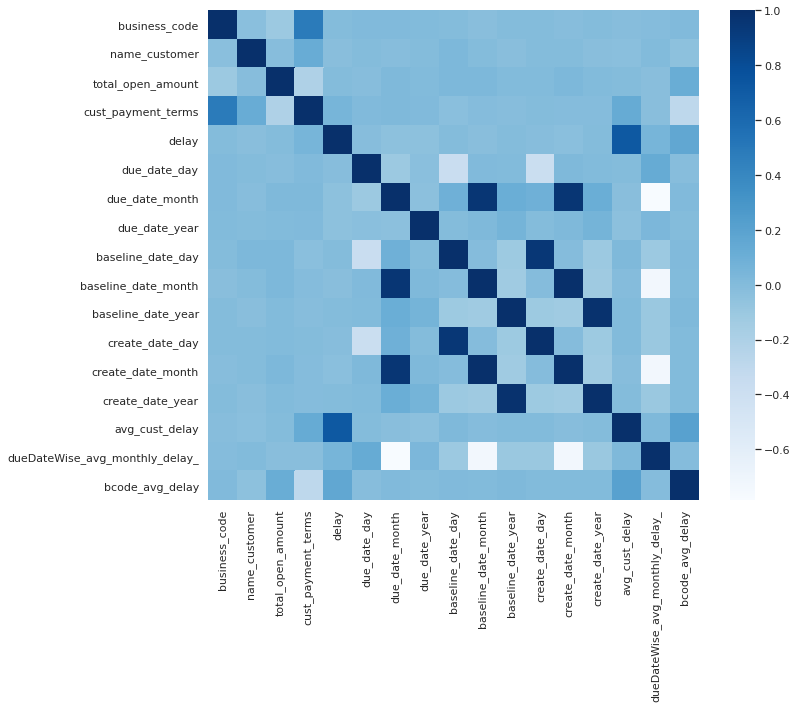

In [142]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(X_train.corr(),cmap="Blues")
plt.show()

**Dropping columns with high correlation**

In [143]:
#due_date_month has high correlation with baseline date month and create date month
#dropping these columns
X_train.drop(columns = ["baseline_date_month","create_date_month"], inplace = True)
X_train.reset_index(inplace=True, drop=True)

In [144]:
x_val1.drop(columns = ["baseline_date_month","create_date_month"], inplace = True)
x_val1.reset_index(inplace=True, drop=True)

In [145]:
x_val2.drop(columns = ["baseline_date_month","create_date_month"], inplace = True)
x_val2.reset_index(inplace=True)

In [146]:
test.drop(columns = ["baseline_date_month","create_date_month"], inplace = True)
test.reset_index(inplace=True)

In [147]:
X_train.head()

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay,due_date_day,due_date_month,due_date_year,baseline_date_day,baseline_date_year,create_date_day,create_date_year,avg_cust_delay,dueDateWise_avg_monthly_delay_,amount_bins,bcode_avg_delay
0,1,200769623,4147,2019-01-09,2018-12-30,2019-01-14,983.1666,2018-12-30,39,-5,14,1,2019,30,2018,30,2018,-2.070284,1.983503,1,0.424148
1,1,200769623,4151,2019-01-09,2018-12-30,2019-01-14,12076.1940,2018-12-30,39,-5,14,1,2019,30,2018,30,2018,-2.362720,1.983503,2,0.424148
2,1,200769623,4148,2019-01-10,2018-12-30,2019-01-14,1189.6326,2018-12-30,39,-4,14,1,2019,30,2018,30,2018,-2.366337,1.983503,1,0.424148
3,1,200769623,4145,2019-01-09,2018-12-30,2019-01-14,3814.9722,2018-12-30,39,-5,14,1,2019,30,2018,30,2018,-2.100000,1.983503,2,0.424148
4,1,200759878,3325,2019-01-15,2018-12-30,2019-01-14,18733.2678,2018-12-30,39,1,14,1,2019,30,2018,30,2018,0.901639,1.983503,3,0.424148


In [148]:
#create_date_day have high correlation with baseline_date_day, so we can drop one
X_train.drop(columns = 'create_date_day' , inplace = True)
X_train.reset_index(inplace=True, drop=True)

In [149]:
#baseline_date_year have high correlation with create_date_year, so we drop one
X_train.drop(columns = 'create_date_year' , inplace = True)
X_train.reset_index(inplace=True, drop=True)

In [150]:
x_val1.drop(['create_date_day','create_date_year'],axis=1,inplace=True)
x_val2.drop(['create_date_day','create_date_year'],axis=1,inplace=True)
test.drop(['create_date_day','create_date_year'],axis=1,inplace=True)

In [151]:
X_train.shape

(37159, 19)

In [152]:
x_val1.shape

(3968, 19)

In [153]:
x_val2.shape

(3969, 20)

In [154]:
test.shape

(4734, 15)

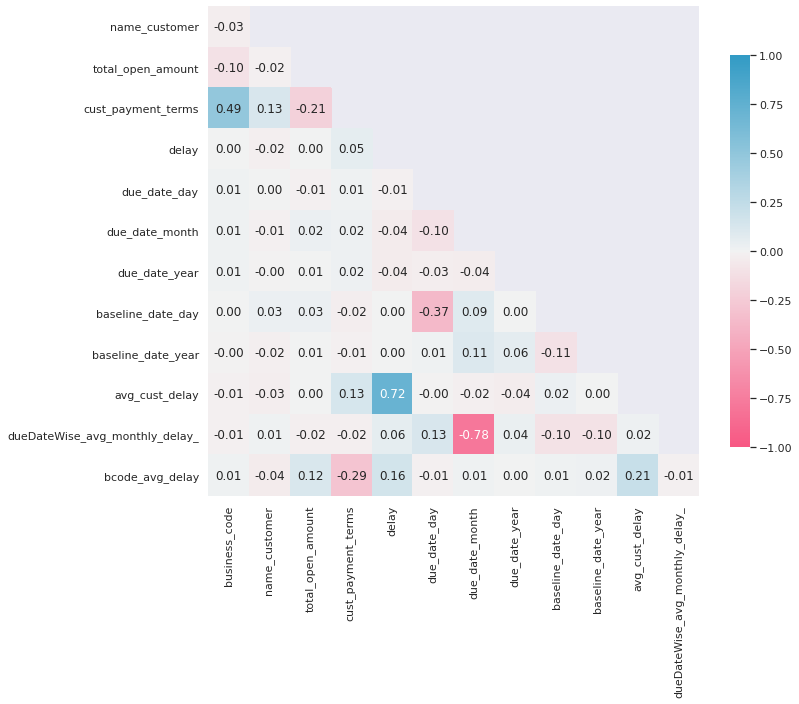

In [155]:
fig, ax = plt.subplots(figsize=(11, 9))
df_corr=X_train.corr()
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
sns.heatmap(corr,cmap=cmap,mask=mask, annot=True, fmt=".2f",vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

In [156]:
#due_date_month and dueDateWise_avg_monthly_delay_ has correlation, dropping one column
X_train.drop("dueDateWise_avg_monthly_delay_",axis=1,inplace=True)

In [157]:
x_val1.drop("dueDateWise_avg_monthly_delay_",axis=1,inplace=True)

In [158]:
x_val2.drop("dueDateWise_avg_monthly_delay_",axis=1,inplace=True)

In [159]:
X_train.drop("cust_number",axis=1,inplace=True)
X_train.head()

,business_code,name_customer,clear_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay,due_date_day,due_date_month,due_date_year,baseline_date_day,baseline_date_year,avg_cust_delay,amount_bins,bcode_avg_delay
0,1,4147,2019-01-09,2018-12-30,2019-01-14,983.1666,2018-12-30,39,-5,14,1,2019,30,2018,-2.070284,1,0.424148
1,1,4151,2019-01-09,2018-12-30,2019-01-14,12076.1940,2018-12-30,39,-5,14,1,2019,30,2018,-2.362720,2,0.424148
2,1,4148,2019-01-10,2018-12-30,2019-01-14,1189.6326,2018-12-30,39,-4,14,1,2019,30,2018,-2.366337,1,0.424148
3,1,4145,2019-01-09,2018-12-30,2019-01-14,3814.9722,2018-12-30,39,-5,14,1,2019,30,2018,-2.100000,2,0.424148
4,1,3325,2019-01-15,2018-12-30,2019-01-14,18733.2678,2018-12-30,39,1,14,1,2019,30,2018,0.901639,3,0.424148


In [160]:
x_val1.drop("cust_number",axis=1,inplace=True)
x_val2.drop("cust_number",axis=1,inplace=True)
test.drop("cust_number",axis=1,inplace=True)

In [161]:
test.shape

(4734, 14)

In [162]:
x_val1.shape, x_val2.shape

((3968, 17), (3969, 18))

In [163]:
for i in X_train.columns:
  if X_train[i].dtype=="datetime64":
    X_train.i=X_train.i.map(datetime.datetime.toordinal)

In [164]:
X_train.head(3)

,business_code,name_customer,clear_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay,due_date_day,due_date_month,due_date_year,baseline_date_day,baseline_date_year,avg_cust_delay,amount_bins,bcode_avg_delay
0,1,4147,2019-01-09,2018-12-30,2019-01-14,983.1666,2018-12-30,39,-5,14,1,2019,30,2018,-2.070284,1,0.424148
1,1,4151,2019-01-09,2018-12-30,2019-01-14,12076.1940,2018-12-30,39,-5,14,1,2019,30,2018,-2.362720,2,0.424148
2,1,4148,2019-01-10,2018-12-30,2019-01-14,1189.6326,2018-12-30,39,-4,14,1,2019,30,2018,-2.366337,1,0.424148


In [165]:
X_train.dtypes

business_code                      int64
name_customer                      int64
clear_date                datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                 int64
delay                              int64
due_date_day                       int64
due_date_month                     int64
due_date_year                      int64
baseline_date_day                  int64
baseline_date_year                 int64
avg_cust_delay                   float64
amount_bins                     category
bcode_avg_delay                  float64
dtype: object

In [166]:
X_train.shape

(37159, 17)

In [167]:
x_val1.shape

(3968, 17)

In [168]:
x_val2.shape

(3969, 18)

**Creating a baseline model for the data**

In [169]:
y=X_train['delay']
X_pass=X_train.drop('clear_date',axis=1)

In [170]:
X_pass.drop(['document_create_date.1','due_in_date','baseline_create_date','delay'],axis=1,inplace=True)#datetime objects

In [171]:
#train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pass,y,test_size=0.2)

In [172]:
#linear regession 
from sklearn.linear_model import LinearRegression
reg = LinearRegression(normalize=True)
reg.fit(xtrain,ytrain)
print("Training complete.")

Training complete.


In [173]:
accuracy = reg.score(xtest,ytest)
print(accuracy*100,'%')

53.057212446082836 %


In [174]:
y_pred=reg.predict(xtest)
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, y_pred)

62.56976877905312

In [175]:
from sklearn.metrics import r2_score 
r2_score(ytest,y_pred)

0.5305721244608284

### Implementing our final model

In [176]:
X_new=X_train.drop(['clear_date','document_create_date.1','due_in_date','baseline_create_date','delay'],axis=1)#datetime objects

In [177]:
X_new.shape

(37159, 12)

In [178]:
y_new=y=X_train['delay']
y_val1=x_val1['delay']
y_val2=x_val2['delay']

In [179]:
x_val1=x_val1.drop(['clear_date','document_create_date.1','due_in_date','baseline_create_date','delay'],axis=1)#datetime objects

In [180]:
x_val1.shape

(3968, 12)

In [181]:
x_val2=x_val2.drop(['clear_date','document_create_date.1','due_in_date','baseline_create_date','index','delay'],axis=1)#datetime objects

In [182]:
x_val2.shape

(3969, 12)

In [183]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(X_pass,y,test_size=0.2)

In [184]:
xtrain2,xtest2,ytrain2,ytest2=train_test_split(X_pass,y,test_size=0.2)

In [185]:
test=test.drop(['clear_date','document_create_date.1','due_in_date','baseline_create_date','index'],axis=1)#datetime objects

In [186]:
test.shape

(4734, 9)

## Implementation of Linear Regression

In [187]:
#linear regession 
reg = LinearRegression(normalize=True)
reg.fit(X_new,y_new)
print("Training complete.")

Training complete.


In [188]:
acc1= reg.score(xtest1,ytest1)
print(acc1*100,'%')

57.06887965804979 %


In [189]:
acc2= reg.score(xtest2,ytest2)
print(acc1*100,'%')

57.06887965804979 %


In [190]:
y_pred1=reg.predict(xtest1)
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest1, y_pred1)

51.692694028425834

In [191]:
y_pred2=reg.predict(xtest2)
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest2, y_pred2)

55.90829067500576

## Implementation of Ridge Regression

In [192]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_new, y_new) 
pred_train_rr= rr.predict(X_new)
print(np.sqrt(mean_squared_error(y_new,pred_train_rr)))
print(r2_score(y_new, pred_train_rr))

pred_test_rr= rr.predict(xtest1)
print(np.sqrt(mean_squared_error(ytest1,pred_test_rr))) 
print(r2_score(ytest1, pred_test_rr))

7.813131199186963
0.5167078368914184
7.189764003613171
0.5706886936041164


In [193]:
acc1= rr.score(xtest1,ytest1)
print(acc1*100,'%')

57.06886936041165 %


In [194]:
acc2= rr.score(xtest2,ytest2)
print(acc1*100,'%')

57.06886936041165 %


## Implementation of Elastic Net

In [195]:
#Elastic Net
from sklearn.linear_model import ElasticNet
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_new, y_new) 
pred_train_enet= model_enet.predict(X_new)
print(np.sqrt(mean_squared_error(y_new,pred_train_enet)))
print(r2_score(y_new, pred_train_enet))

pred_test_enet= model_enet.predict(xtest1)
print(np.sqrt(mean_squared_error(ytest1,pred_test_enet)))
print(r2_score(ytest1, pred_test_enet))

7.815410155871108
0.516425859664242
7.192237883304048
0.5703932048395616


In [196]:
acc1= model_enet.score(xtest1,ytest1)
print(acc1*100,'%')

57.03932048395616 %
